# Anomaly Detection & Time Series | Assignment

## **Assignment Code: DA-AG-018**

*ARGHADEEP MISRA | +91 8250675419 | arghadeepmisra@gmail.com*

**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.**

- Anomaly detection means finding data points that are not normal. It is like when most data follow one pattern but some points are very different. Those different points are called anomaly. This is important in real life because it can show fraud in bank, fault in machine or wrong data entry.

There are three main types. First is point anomaly. This is when a single point is strange compared to all other points. Example if taxi fare are always between 5 to 30 and suddenly one record is 5000, that is point anomaly.

Second is contextual anomaly. This happen when a value is only anomaly in one context. Like temperature 30 degree is normal in summer but not in winter. So same value can be normal or abnormal depending on time or place.

Third is collective anomaly. This is when many values together are strange but each one alone looks fine. Example when energy usage rise for many minutes and then drop quickly, each minute looks ok but the whole pattern is not ok. Another example is many failed login at same time, this can mean attack.

So anomaly detection is about finding these strange data points or pattern. It is not easy because anomaly are rare. But it is very useful to detect them.

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**

- Isolation Forest, DBSCAN and Local Outlier Factor are three methods for anomaly detection but they work in different way.

Isolation Forest works by splitting the data again and again. Anomalies get isolated fast because they are different from rest points. It is good for high dimension data and big datasets. Example use is fraud detection in credit card data.

DBSCAN is a clustering method. It makes clusters of dense data. Points that do not belong to any cluster are anomaly. It is good when data have shape that is not simple and also when number of clusters is not known. Example use is finding noise points in GPS tracking data.

Local Outlier Factor (LOF) looks at density around each point. If a point has very low density compared to its neighbors, it is anomaly. It is local because it compare with nearby points not the whole dataset. Example use is to find outlier in housing prices where some areas have very different range.

So the main difference is Isolation Forest is tree based and works well for high dimension, DBSCAN is cluster based and find noise, LOF is density based and find local outliers.

**Question 3: What are the key components of a Time Series? Explain each with one
example**

- A time series is data collected over time in order. It has some key components that explain the pattern.

First is trend. Trend is the long term movement of the data. It can go up, down or stay flat. Example airline passengers increase slowly year by year, that is upward trend.

Second is seasonality. Seasonality means repeating pattern in fixed period like days, months or years. Example sales are high in December every year, that is seasonal effect.

Third is cyclical. Cyclical pattern is like seasonality but not fixed, it happen in longer period like economic cycles. Example growth and recession in economy.

Fourth is irregular or residual. This is random part that we cannot explain by trend or season. Example sudden drop in stock price due to news.

So a time series is mix of trend, season, cycle and random. Knowing these parts helps to forecast better.

**Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?**

- A stationary time series means its properties do not change with time. The mean, variance and covariance stay same no matter which part of series we look at. This is important because many models like ARIMA only work good if data is stationary.

To test stationarity we can use plots and tests. One simple way is to draw rolling mean and rolling variance and check if they stay constant. Another way is to use Augmented Dickey Fuller (ADF) test. If p value is small (less than 0.05) then we can say series is stationary.

If series is not stationary we can make it stationary by some transformations. One method is differencing, subtract current value with previous value. Example Yt - Yt-1. This can remove trend. Another method is log transform or square root transform to reduce variance. Also sometimes seasonal differencing is done to remove seasonality.

Example the airline passengers data is not stationary because it has trend and season. If we take log and then difference, it becomes more stationary.

So the main idea is stationary means stable behavior over time, and we can check with tests and transform with differencing or log if needed.

**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

- AR, MA, ARIMA, SARIMA and SARIMAX are all models for time series but they are not same.

AR means Auto Regressive. It use past values of the series to predict the next value. Example tomorrow value depend on last 3 days values.

MA means Moving Average. It does not use past values directly but use past error terms. Example if yesterday forecast was wrong by 2, model adjust next forecast using that error.

ARIMA means Auto Regressive Integrated Moving Average. It combine AR and MA and also add differencing (the I part). Differencing helps to make non stationary series into stationary. So ARIMA is more general than only AR or MA.

SARIMA means Seasonal ARIMA. It add seasonal parts on top of ARIMA. So it can handle data with seasonality like monthly sales or airline passengers.

SARIMAX means Seasonal ARIMA with exogenous variables. Exogenous means extra features outside the main series. Example we want to forecast sales but also include promotion data or weather as inputs.

So in short AR and MA are basic, ARIMA is their mix with differencing, SARIMA handles season, and SARIMAX handles season plus extra variables.

**Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components**

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


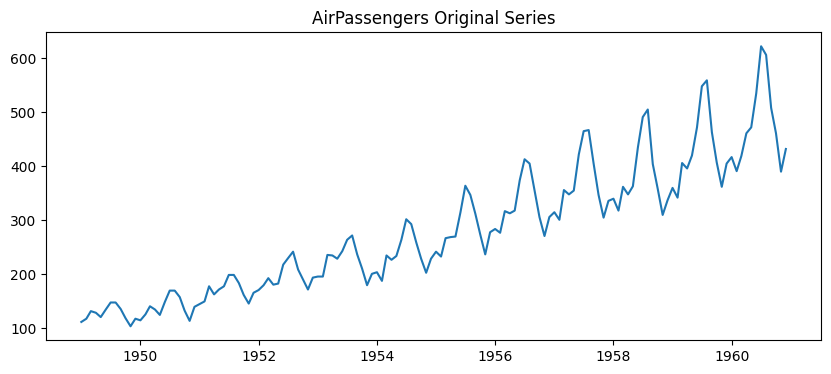

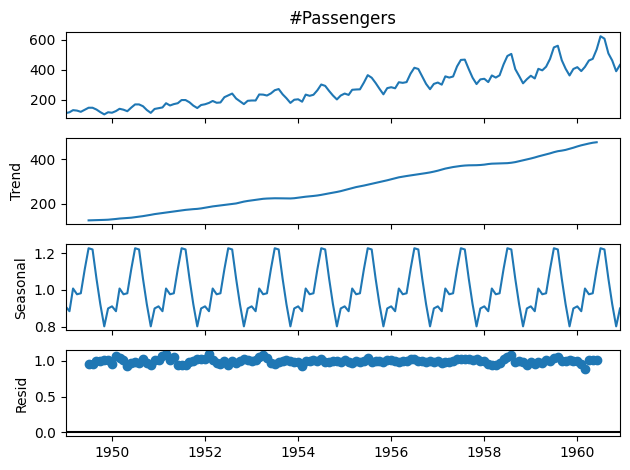

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("AirPassengers.csv")

print(data.head())

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(10,4))
plt.plot(data['#Passengers'])
plt.title("AirPassengers Original Series")
plt.show()

decompose = seasonal_decompose(data['#Passengers'], model='multiplicative')
decompose.plot()
plt.show()


**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.**

In [8]:
data_taxi = pd.read_csv("NYC_taxi_fare_data.csv")

print(data_taxi.head())

/tmp/ipython-input-4294656020.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_taxi = pd.read_csv("NYC_taxi_fare_data.csv")


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4       2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


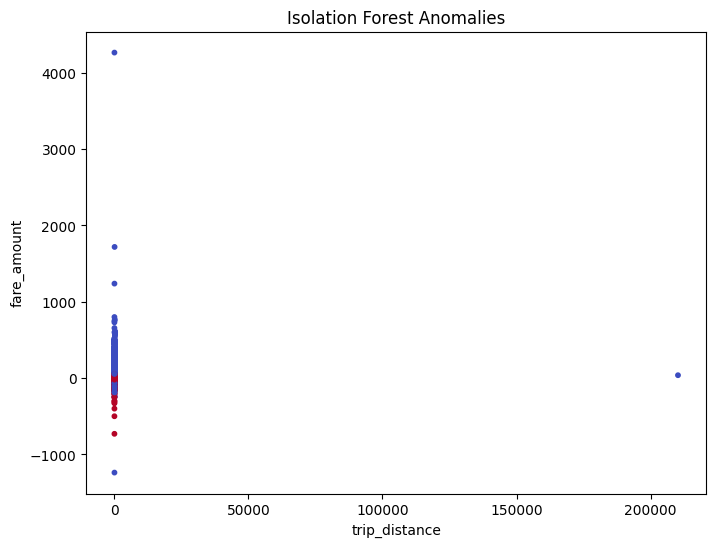

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

X = data_taxi[['trip_distance','fare_amount']]

model = IsolationForest(contamination=0.02, random_state=42)
data_taxi['anomaly'] = model.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(data_taxi['trip_distance'], data_taxi['fare_amount'],
            c=data_taxi['anomaly'], cmap='coolwarm', s=10)
plt.xlabel("trip_distance")
plt.ylabel("fare_amount")
plt.title("Isolation Forest Anomalies")
plt.show()

**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib**

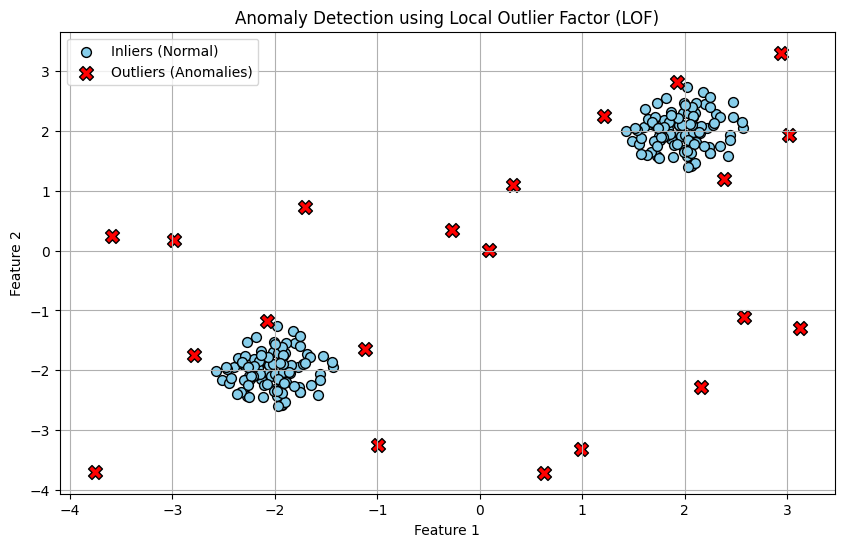

Number of anomalies detected: 21


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)


X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X = np.r_[X_inliers, X_outliers]

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

y_pred = lof.fit_predict(X)


inliers = X[y_pred == 1]
outliers = X[y_pred == -1]


plt.figure(figsize=(10, 6))


plt.scatter(inliers[:, 0], inliers[:, 1], c='skyblue', s=50, edgecolor='k', label='Inliers (Normal)')


plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=100, edgecolor='k', marker='X', label='Outliers (Anomalies)')

plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
print(f"Number of anomalies detected: {len(outliers)}")

**END**

---

